# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

input :Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors
    
output : Number of predicted wins (W)

# import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df["W"].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

Number of predicted wins(w) is our target column. When we check the value_counts of column 'w' ,we can understand that it is a regression type dataset.

In [4]:
df.shape

(30, 17)

In [5]:
df.drop_duplicates(inplace = True)
df.shape

(30, 17)

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


1. There is no missing value.

2. Here we can see that mean is higher than the standard deviation in all the columns so datas are highly spreaded.

3. Relationship between mean and median(50%):
    
    column w : median is little bit higher than mean so it is left skewed.
    
    column R : Here also median is higher than mean.
    
    columns AB : mean is higher than median so right skewed.
   
    column H : mean is higher.
    
    column 2B: median is higher.
    
    column 3B :normal.
    
    column HR : mean is higher.
    
    column BB : median is higher.
    
    column SO : median is higher.
    
    column SB : normal.
    
    column RA: median is higher.
    
    column ER: median is higher.
    
    column ERA : median is higher.
    
    column CG : mean is littile bit higher.
    
    column SHO : median is higher.
    
    column SV : mean is higher.
    
    column E : mean is higher. 

4.  There is differents in 75% percentile and max in all the columns but higher differents can see columns(R,AB,H,BB,SO,RA,ER)
    
    Through these above observation we can conclude that there is outlier in some  columns.

In [7]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the columns have integer type data except ERA 

In [8]:
# lets check unique value
df.apply(lambda x: len(x.unique()))

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

as compare to size of the data we can understand that only Column CG is categorical

In [9]:
df["CG"].value_counts()

1     7
7     4
2     4
6     3
5     3
3     3
0     3
4     2
11    1
Name: CG, dtype: int64

CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.

<AxesSubplot:>

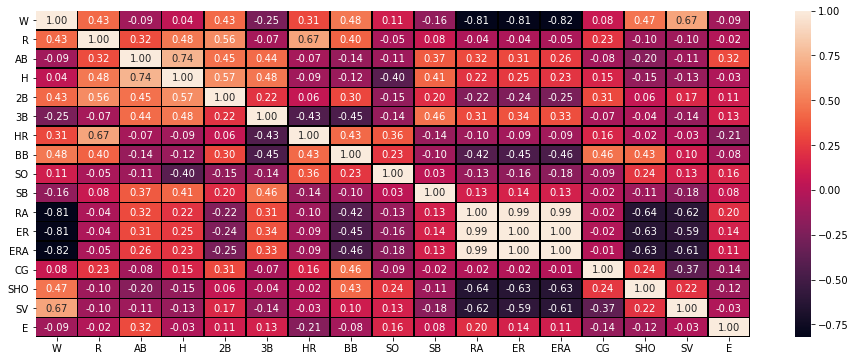

In [10]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,linewidths = 0.5,linecolor="black",fmt = '.2f')

Here we can see that winner(W) and saves(SV)are highly correlated.Runs Allowed(RA), Earned Runs(ER), Earned Run Average (ERA) these three columns are highly correlated with each other so, need to handle multicolinaiarity issue and also these are negative correlated with target column.

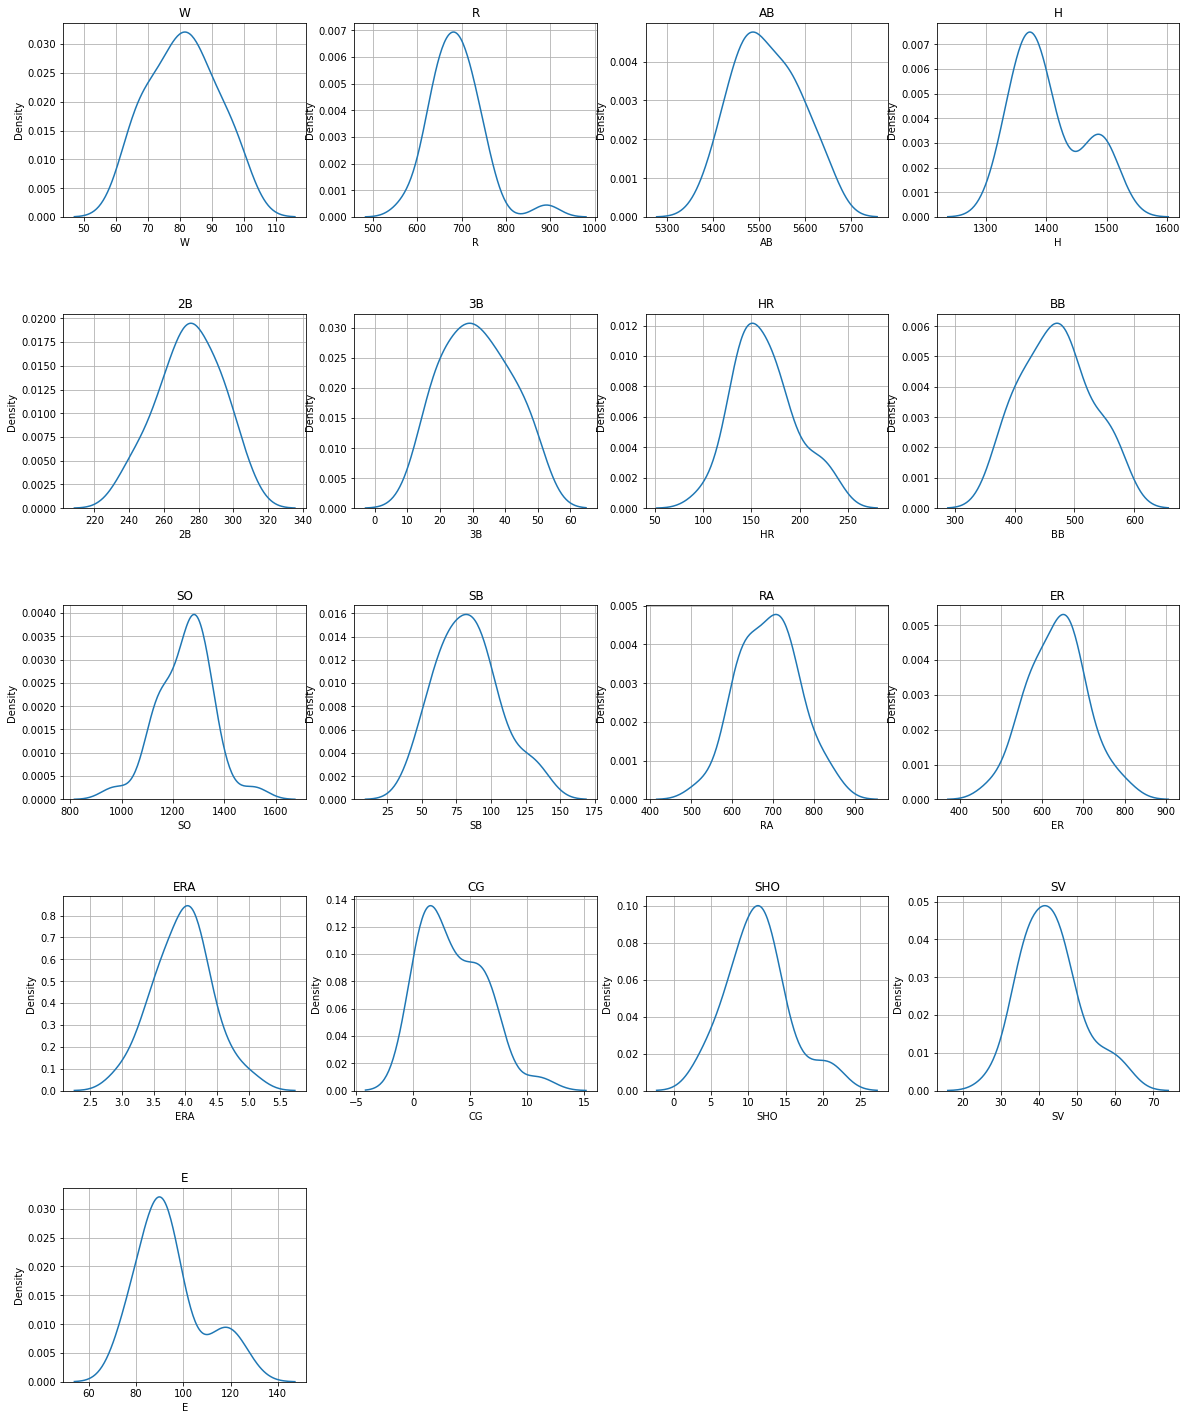

In [11]:

num_columns = len(df.columns)
num_rows = (num_columns - 1) // 4 + 1  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5*num_rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df.columns):
    ax = axes[i // 4, i % 4]
    sns.kdeplot(data=df[column], ax=ax)
    ax.set_title(column)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_columns, num_rows*4):
    fig.delaxes(axes[j // 4, j % 4])


plt.show()

 Not all the variables are perfectly distributed but Almost similar to normal curve. Let's check it in detailed in the further step

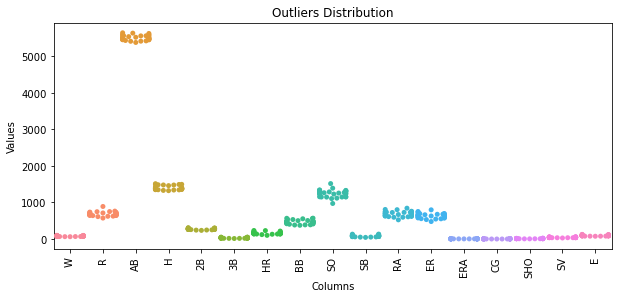

In [12]:

plt.figure(figsize=(10, 5))
plt.subplots_adjust(bottom=0.25)

sns.swarmplot(data=df, orient='v')
plt.xticks(rotation=90)
plt.title('Outliers Distribution')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()

through swamplot we can't get the clear picture of outlier but through the graph some columns has outliers

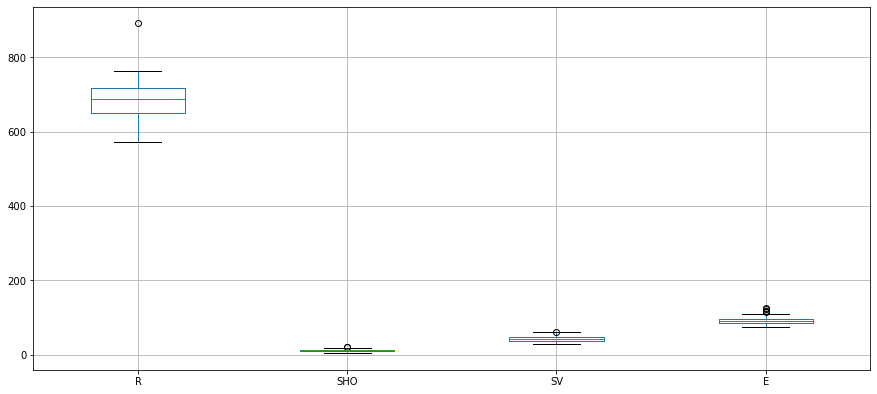

In [13]:
df[["R","SHO","SV","E"]].boxplot(figsize=(15,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

See these four columns has outliers

# outlier

In [14]:
# zscore value measurment
zscr=np.abs(zscore(df))

threshold=3
print(np.where(zscr>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [15]:
# lets check the presence of outlier

print('shape before removing the outlier:',df.shape)

df_new=df[(zscr<3).all (axis=1)]#removing the outlier 

print("shape after removing the outlier:",df_new.shape)

shape before removing the outlier: (30, 17)
shape after removing the outlier: (29, 17)


In [16]:
data_loss=((30-29)/30)*100
data_loss

3.3333333333333335

when we remove the ouliers we lost only 3.3 % of data

# Skewness

In [17]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

features H,CG,SV and E can see the skewness but CG is consider as the categorical column so need not to handle skewness and outliers 

In [18]:
df_new["H"]=np.sqrt(df_new["H"])
df_new["SV"]=np.sqrt(df_new["SV"])
df_new["E"]=np.sqrt(df_new["E"])

In [19]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.370280
E      0.714966
dtype: float64

In [20]:
df_new["H"]=np.cbrt(df_new["H"])
df_new["E"]=np.cbrt(df_new["E"])

In [21]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.746079
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.370280
E      0.627851
dtype: float64

In [22]:
df_new["H"]=np.log1p(df_new["H"])
df_new["E"]=np.log1p(df_new["E"])

In [23]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.740187
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.370280
E      0.597566
dtype: float64

NOW Almost columns skewnes are reduced as per my threshold value -/+0.5 but in the columns 'H' still skewed so can changed threshold value -/+ 0.7

In [24]:
df=df_new

In [25]:
# split the data as input and output
x = df.drop(columns=["W"],axis=1)
y =df["W"]

In [26]:
import statsmodels.api as sm

In [27]:
X_with_constant = sm.add_constant(x)
model = sm.OLS(y, X_with_constant)

In [28]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     15.46
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.27e-05
Time:                        17:40:04   Log-Likelihood:                -63.945
No. Observations:                  29   AIC:                             161.9
Df Residuals:                      12   BIC:                             185.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7815    499.870      0.014      0.9

In [29]:
scal = StandardScaler()
x = scal.fit_transform(x)

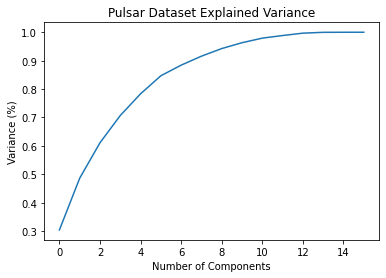

In [30]:
pca = PCA().fit(x)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.30441886, 0.48646947, 0.6112232 , 0.7070614 , 0.78342038,
       0.84694325, 0.88423522, 0.91581646, 0.94256504, 0.96320879,
       0.97926899, 0.98843379, 0.99676402, 0.99973498, 0.99998195,
       1.        ])

In this case, the 15th component explains approximately 99.99% of the variance, and including all 16 components achieves a cumulative variance of 100%.

In [32]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(x)

In [33]:
X_pca_with_constant = sm.add_constant(X_pca)
model = sm.OLS(y, X_pca_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     34.12
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           3.22e-06
Time:                        17:40:13   Log-Likelihood:                -96.662
No. Observations:                  29   AIC:                             197.3
Df Residuals:                      27   BIC:                             200.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.5517      1.305     61.718      0.0

See it remove all the multicollinearity

In [34]:
X_pca.shape

(29, 1)

In [36]:
max_r_score=0
for r_state in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(X_pca, y,random_state = r_state,test_size=0.20)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  1  is:  0.686431226193044
r2_score corresponding to random state:  2  is:  -1.7693377244585595
r2_score corresponding to random state:  3  is:  0.5770431323903467
r2_score corresponding to random state:  4  is:  0.5012509125315384
r2_score corresponding to random state:  5  is:  0.7293591912669435
r2_score corresponding to random state:  6  is:  0.40032293997736124
r2_score corresponding to random state:  7  is:  0.1388517113399501
r2_score corresponding to random state:  8  is:  0.4235204345577471
r2_score corresponding to random state:  9  is:  -0.08879727759987976
r2_score corresponding to random state:  10  is:  0.42531777011994865
r2_score corresponding to random state:  11  is:  0.2691036083360453
r2_score corresponding to random state:  12  is:  0.15398139245675435
r2_score corresponding to random state:  13  is:  0.46744328281468506
r2_score corresponding to random state:  14  is:  0.38646966060840926
r2_score corresponding to random sta

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X_pca,y,random_state=97,test_size=0.20)

In [38]:
def evaluate_regression_models(models, X_train, y_train, X_test, y_test):
    results = []
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        
        # Append results to the list
        results.append({'Model': model_name, 'R-squared': r2, 'MSE': mse})
    results_df = pd.DataFrame(results)
    
    return results_df

In [39]:
linear_regression = LinearRegression()
random_forest = RandomForestRegressor()
svr = SVR()
decision_tree = DecisionTreeRegressor()

# Define the models dictionary
models = {
    'Linear Regression': linear_regression,
    'Random Forest': random_forest,
    'SVR': svr,
    'DecisionTreeRegressor' : decision_tree
}

results = evaluate_regression_models(models, x_train, y_train, x_test, y_test)
print(results)

                   Model  R-squared        MSE
0      Linear Regression   0.864699  15.533299
1          Random Forest   0.767989  26.636150
2                    SVR   0.217663  89.816673
3  DecisionTreeRegressor   0.628357  42.666667


In [40]:
def calculate_cross_val_scores(models, X, y, cv=5):
    results = []
    
    for model_name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=cv)
        result = {
            'Model': model_name,
            'Cross-Validation Scores': cv_scores.mean()
        }
        
        results.append(result)
    df_results = pd.DataFrame(results)
    
    return df_results

In [41]:
cross_val_scores_df = calculate_cross_val_scores(models, X_pca, y, cv=5)
print(cross_val_scores_df)

                   Model  Cross-Validation Scores
0      Linear Regression                -0.194195
1          Random Forest                -0.628958
2                    SVR                -0.368110
3  DecisionTreeRegressor                -1.648038


# LinearRegression

In [56]:
parameter={'fit_intercept':[True,False],
          'n_jobs':np.arange(2,10),
          'copy_X':[True,False],
          'positive':[True,False]}
gcv=GridSearchCV(LinearRegression(),parameter,cv=3)
gcv.fit(x_train,y_train)
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'positive': False}

In [57]:
final_mod =LinearRegression(copy_X= True, fit_intercept= True, n_jobs = 2, positive = False)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

86.4699061993803


In [58]:
crs = cross_val_score(final_mod,x,y,cv=5,scoring='r2').mean()
crs

0.06925042519671956

# SVR

In [59]:
def svrkernel(ker):
    svr = SVR(kernel=ker)
    svr.fit(x_train,y_train)
    svr.score(x_train,y_train)
    pred=svr.predict(x_test)
    print("r2_score:",r2_score(y_test,pred))
    print('MSE:',np.sqrt(mean_squared_error(y_test,pred)))

In [60]:
svrkernel('linear')

r2_score: 0.7888222067969266
MSE: 4.923858636239983


In [61]:
svrkernel('poly')

r2_score: 0.6279963234570423
MSE: 6.535142596319032


In [62]:
svrkernel('rbf')

r2_score: 0.21766266382474697
MSE: 9.477165848050427


 so in this svr model kernel= linear is the best parameter

In [63]:
parameter ={'kernel':["linear","rbf","poly","sigmoid"],
          'gamma':["scale","auto"],
           'epsilon':[0.001,0.0001,0.1,0.11,1.0,0.01]}
gcv=GridSearchCV(SVR(),parameter,cv=3)
gcv.fit(x_train,y_train)
gcv.best_params_

{'epsilon': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

In [64]:
final_mod =SVR(epsilon=1.0,gamma='scale',kernel='linear')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

76.79979367718433


In [65]:
crs = cross_val_score(final_mod,x,y,cv=5,scoring='r2').mean()
crs

0.3480969673054809

# DecisionTreeRegressor

In [66]:
def treespliter(split):
    tree = DecisionTreeRegressor(splitter=split)
    tree.fit(x_train,y_train)
    tree.score(x_train,y_train)
    pred=tree.predict(x_test)
    print("r2_score:",r2_score(y_test,pred))
    print('MSE:',np.sqrt(mean_squared_error(y_test,pred)))

In [67]:
treespliter('best')

r2_score: 0.6283571255746432
MSE: 6.531972647421808


In [68]:
treespliter('random')

r2_score: 0.4193080087103799
MSE: 8.16496580927726


In [69]:
parameter = {"criterion":["mse","friedman_mse","mae","poisson"],
           "splitter":["best","random"],
            "max_depth" :np.arange(2,20)}
gcv=GridSearchCV(DecisionTreeRegressor(),parameter,cv=3)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mse', 'max_depth': 2, 'splitter': 'random'}

In [70]:
final_mod =DecisionTreeRegressor(criterion='mse',max_depth=2,splitter='random')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

76.30781716267443


In [71]:
crs = cross_val_score(final_mod,x,y,cv=5,scoring='r2').mean()
crs

-0.9485390823753095

# Ensemple Technic

bagging

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))


0.7522222114686666


boosting

In [73]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor(n_estimators=100)
ab.fit(x_train,y_train)
predrf=ab.predict(x_test)
print(r2_score(y_test,predrf))


0.6957012662311477


 ----LinearRegression is the best model.
 
 ---r2 score is 86.
 
 ---After that improving the performense of the model try to use gridsearchcv with parameters but can't notice no more           
    improvment 
    
 ---try to boosting the performance also try to ensemble method.   

# Save model

In [74]:
import joblib
joblib.dump(LinearRegression(),"lrg.obj")

['lrg.obj']